In [1]:
# first of all we import the packages we will use
import pandas as pd       # linear algebra
import numpy as np        # data processing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

 

In [2]:
# we read the data 
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# checking for any missing values, in our case there happened to be some missing values
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [4]:
df.size

115020

In [5]:
# we dropped the missing values from our gross because it's the main topic of analysis
df.dropna(subset = 'gross', inplace = True )

In [6]:
# we check for missing values once more and there are no missing values any more 
df.isnull().sum()

name           0
rating        54
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         3
star           0
country        1
budget      2043
gross          0
company       10
runtime        1
dtype: int64

In [7]:
# we filled all the numeric data with its mean
for i in df.describe().columns:
    df[i] = df[i].fillna(df[i].mean())

In [8]:
df.isnull().sum()

name         0
rating      54
genre        0
year         0
released     0
score        0
votes        0
director     0
writer       3
star         0
country      1
budget       0
gross        0
company     10
runtime      0
dtype: int64

In [9]:
# we filled the remaining categorical data with its mode 
for i in df.columns:
    if i in df.describe().columns:
        continue 
    else:
        df[i] = df[i].fillna(df[i].mode()[0])
        

In [10]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [11]:
# checking for duplicates, and there are no duplicates in our case
df.duplicated().sum()

0

In [12]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [13]:
# to better understand the numeric data, we need to use the .describe() method.
# This gives us an understanding of the central tendencies of the data
df.describe()

,year,score,votes,budget,gross,runtime
count,7479.000000,7479.000000,7.479000e+03,7.479000e+03,7.479000e+03,7479.000000
mean,2000.657708,6.398757,9.014732e+04,3.593864e+07,7.850054e+07,107.442899
std,11.054811,0.962966,1.648068e+05,3.542045e+07,1.657251e+08,18.512044
min,1980.000000,1.900000,3.400000e+01,6.000000e+03,3.090000e+02,63.000000
25%,1991.000000,5.800000,9.900000e+03,1.400000e+07,4.532056e+06,95.000000
50%,2001.000000,6.500000,3.400000e+04,3.500000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.600000e+04,3.593864e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [14]:
# checking the types of our numeric data 
df.describe().dtypes

year       float64
score      float64
votes      float64
budget     float64
gross      float64
runtime    float64
dtype: object

In [15]:
# we will extract the correct year from our release date 
df['correct_year']= df['released'].str.split(',' , expand = True)[1].str.split(' ' , expand = True)[1]

In [16]:
df['correct_year'].unique()

array(['1980', '1981', '1984', None, '1983', '1982', '1987', '1985',
       '1986', '1988', '1990', '1989', '1992', '2008', '1991', '1993',
       '2001', '1999', '2016', '1997', '1994', '2019', '1996', '1995',
       '2000', '2014', '1998', '2002', '2003', '2005', '2004', '2006',
       '2007', '2010', '2011', '2009', '2013', '2015', '2012', '2017',
       '2018', '2020'], dtype=object)

In [17]:
df['correct_year'].isnull().sum()

49

In [18]:
# we fill the missing values with its mode 
df['correct_year'].fillna(df['correct_year'].mode()[0], inplace = True)

In [19]:
# after comparing the year and the correct year i extracted it seems they are not identical 
df['year'].equals(df['correct_year'])

False

In [20]:
# so i decided to drop the year column 
df.drop('year',axis = 1, inplace = True)

In [21]:
# extracting the month
df['month']= df['released'].str.split(',' , expand = True)[0].str.split(' ' , expand = True)[0]

In [22]:
df['month'].unique()

array(['June', 'July', 'May', 'December', 'October', 'September',
       'February', 'April', 'August', 'March', 'January', 'November',
       '1982', '1985', '1987', '1990', '1995', '2019', '2013'],
      dtype=object)

In [23]:
df.loc[df['month'] == '1985']

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year,month
786,Taipei Story,Not Rated,Drama,1985 (Taiwan),7.7,2500.0,Edward Yang,T'ien-wen Chu,Chin Tsai,Taiwan,3.593864e+07,35336.0,Evergreen Film Company,119.0,2019,1985
800,O.C. and Stiggs,R,Comedy,1985 (United States),5.4,1200.0,Robert Altman,Tod Carroll,Daniel Jenkins,United States,7.000000e+06,29815.0,Metro-Goldwyn-Mayer (MGM),109.0,2019,1985


In [24]:
# filtering our month column 
for i in ['1982', '1985', '1987', '1990', '1995', '2019', '2013']:
    df= df[df['month'] != i ]

In [25]:
df['month'].unique()

array(['June', 'July', 'May', 'December', 'October', 'September',
       'February', 'April', 'August', 'March', 'January', 'November'],
      dtype=object)

In [26]:
month_map = {'January': 1,'February': 2,'March': 3,'April': 4,
             'May': 5,'June': 6,'July': 7,'August': 8,
             'September': 9,'October': 10,'November': 11,'December': 12}

In [27]:
# assigning numeric values for months  
df['month']= df['month'].map(month_map)

In [28]:
df['month'].unique()

array([ 6,  7,  5, 12, 10,  9,  2,  4,  8,  3,  1, 11], dtype=int64)

In [29]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year,month
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980,6
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980,7
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980,6
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980,7
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980,7


In [30]:
df.describe().columns

Index(['score', 'votes', 'budget', 'gross', 'runtime', 'month'], dtype='object')

In [31]:
# assigning the following data to integers
for i in ['votes', 'budget', 'gross', 'runtime', 'correct_year','month']:
    df[i] = df[i].astype(int)

In [32]:
# sorting our data by gross to see which has the most gross revenues
# and while looking we noticed that there are negative gross revenues
# which were avatar, avengers:endgame and titanic 
# so i reassigned it with its real values later on in the analysis to have better vision of the data

df.sort_values(by = 'gross',ascending = False)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year,month
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015,12
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018,4
7480,The Lion King,PG,Animation,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118,2019,7
6653,Jurassic World,PG-13,Action,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124,2015,6
6043,The Avengers,PG-13,Action,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143,2012,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2417,Madadayo,R,Drama,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134,1993,4
3203,Trojan War,PG-13,Comedy,"October 1, 1997 (Brazil)",5.7,5800,George Huang,Andy Burg,Will Friedle,United States,15000000,309,Daybreak,85,1997,10
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,-2147483648,Twentieth Century Fox,162,2009,12
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181,2019,4


In [33]:
# Checking the indices with the negative values
df.loc[df['gross'] < 0]

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year,month
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,-2147483648,Twentieth Century Fox,194,1997,12
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,-2147483648,Twentieth Century Fox,162,2009,12
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181,2019,4


In [34]:
# assigning the real values to titanic, avatar, andavengeres:endgame
df['gross'].loc[[3045, 5445, 7445]] = (2260000000, 2900000000, 2800000000) 

C:\Users\sasa_\AppData\Local\Temp\ipykernel_10680\3338507960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gross'].loc[[3045, 5445, 7445]] = (2260000000, 2900000000, 2800000000)


In [35]:
df.loc[7445]

name                         Avengers: Endgame
rating                                   PG-13
genre                                   Action
released        April 26, 2019 (United States)
score                                      8.4
votes                                   903000
director                         Anthony Russo
writer                      Christopher Markus
star                         Robert Downey Jr.
country                          United States
budget                               356000000
gross                               2800000000
company                         Marvel Studios
runtime                                    181
correct_year                              2019
month                                        4
Name: 7445, dtype: object

In [36]:
# now we can see that these 3 movies had the highest gross revenues
df.sort_values(by = 'gross', ascending = False)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year,month
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2900000000,Twentieth Century Fox,162,2009,12
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2800000000,Marvel Studios,181,2019,4
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2260000000,Twentieth Century Fox,194,1997,12
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015,12
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,"February 9, 2001 (United States)",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35938637,1400,British Broadcasting Corporation (BBC),103,2001,2
7625,The Untold Story,R,Comedy,"January 11, 2019 (United States)",5.7,320,Shane Stanley,Lee Stanley,Miko Hughes,United States,35938637,790,Visual Arts Entertainment,104,2019,1
7580,Run with the Hunted,Not Rated,Crime,"June 26, 2020 (United States)",5.2,735,John Swab,John Swab,Ron Perlman,United States,35938637,682,Roxwell Films,93,2020,6
2417,Madadayo,R,Drama,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134,1993,4


In [37]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year,month
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980,6
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980,7
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980,6
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980,7
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980,7


In [38]:
# extracting the countries 
df['Country'] = df['released'].str.extract(r'\((.*?)\)') 

In [39]:
df['Country'].unique()

array(['United States', 'United Kingdom', 'France', 'Australia', 'Canada',
       'Brazil', 'Sweden', 'South Korea', 'Japan', 'West Germany',
       'Italy', 'Argentina', 'Netherlands', 'Uruguay', 'Hong Kong',
       'Spain', 'Finland', 'Denmark', 'South Africa', 'Philippines',
       'Portugal', 'Mexico', 'Germany', 'New Zealand', 'Greece',
       'Singapore', 'Poland', 'Federal Republic of Yugoslavia', 'Iceland',
       'Belgium', 'Israel', 'Hungary', 'India', 'China', 'Russia',
       'Norway', 'Ireland', 'Austria', 'Thailand', 'Puerto Rico',
       'Taiwan', 'Turkey', 'Romania', 'Czech Republic', 'Latvia', 'Iran',
       'Indonesia', 'Bahrain', 'Kazakhstan', 'Malaysia', 'Croatia',
       'Bulgaria', 'Lebanon', 'United Arab Emirates', 'Ukraine',
       'Bahamas', 'Kuwait', 'Vietnam'], dtype=object)

In [40]:
df.describe().columns

Index(['score', 'votes', 'budget', 'gross', 'runtime', 'correct_year',
       'month'],
      dtype='object')

In [41]:
# checking for our numeric data's correlation 
df[df.describe().columns].corr()

,score,votes,budget,gross,runtime,correct_year,month
score,1.000000,0.413295,0.061165,0.186211,0.397647,0.103147,0.054716
votes,0.413295,1.000000,0.419206,0.630362,0.309545,0.203242,0.059283
budget,0.061165,0.419206,1.000000,0.712137,0.265742,0.256431,0.055828
gross,0.186211,0.630362,0.712137,1.000000,0.245225,0.242549,0.058681
runtime,0.397647,0.309545,0.265742,0.245225,1.000000,0.112094,0.071639
correct_year,0.103147,0.203242,0.256431,0.242549,0.112094,1.000000,-0.023490
month,0.054716,0.059283,0.055828,0.058681,0.071639,-0.023490,1.000000


Text(47.24999999999999, 0.5, 'Movie features')

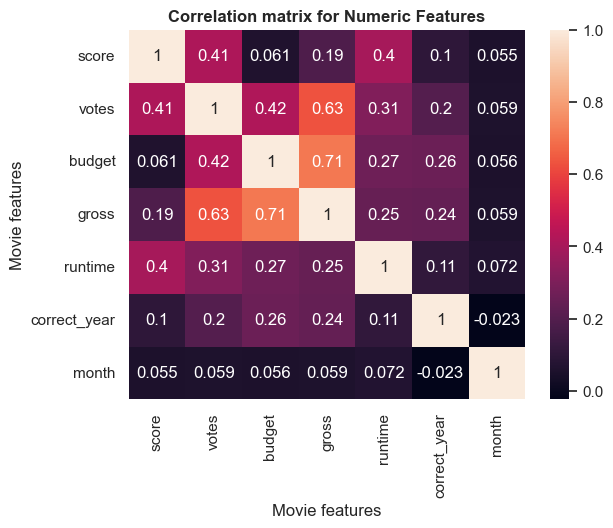

In [42]:
# plotting our findings to have a better vision
sns.heatmap(df[df.describe().columns].corr(), annot = True )
plt.title("Correlation matrix for Numeric Features",  fontsize =  12 , fontweight = 'bold')
plt.xlabel("Movie features")
plt.ylabel("Movie features")


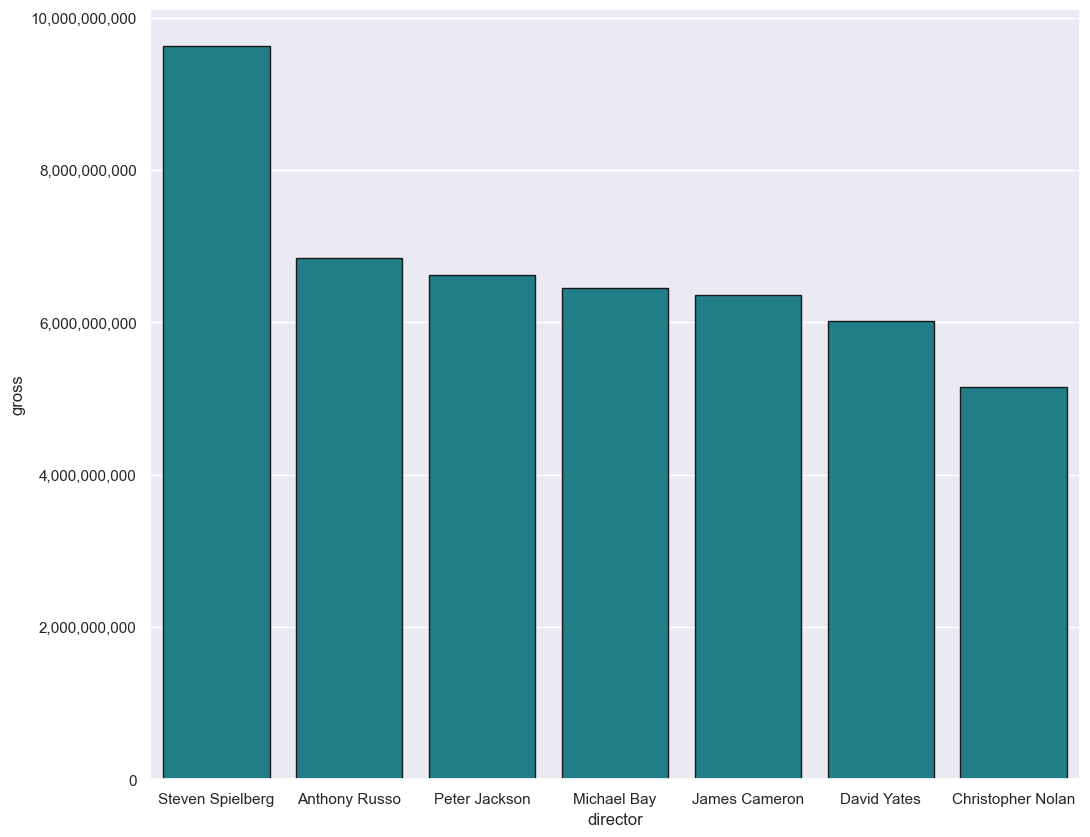

In [63]:
# if you want to invest in a director for a movie,
# these are top tier directors with the highest profit movie margins.
plt.figure(figsize = (12,10))
sns.barplot(x = df.groupby('director')['gross'].sum().sort_values(ascending = False)[:7].index,
            y = df.groupby('director')['gross'].sum().sort_values(ascending = False)[:7]
            , data = df, color = '#108A99', edgecolor = 'k').yaxis.set_major_formatter('{x:,.0f}')

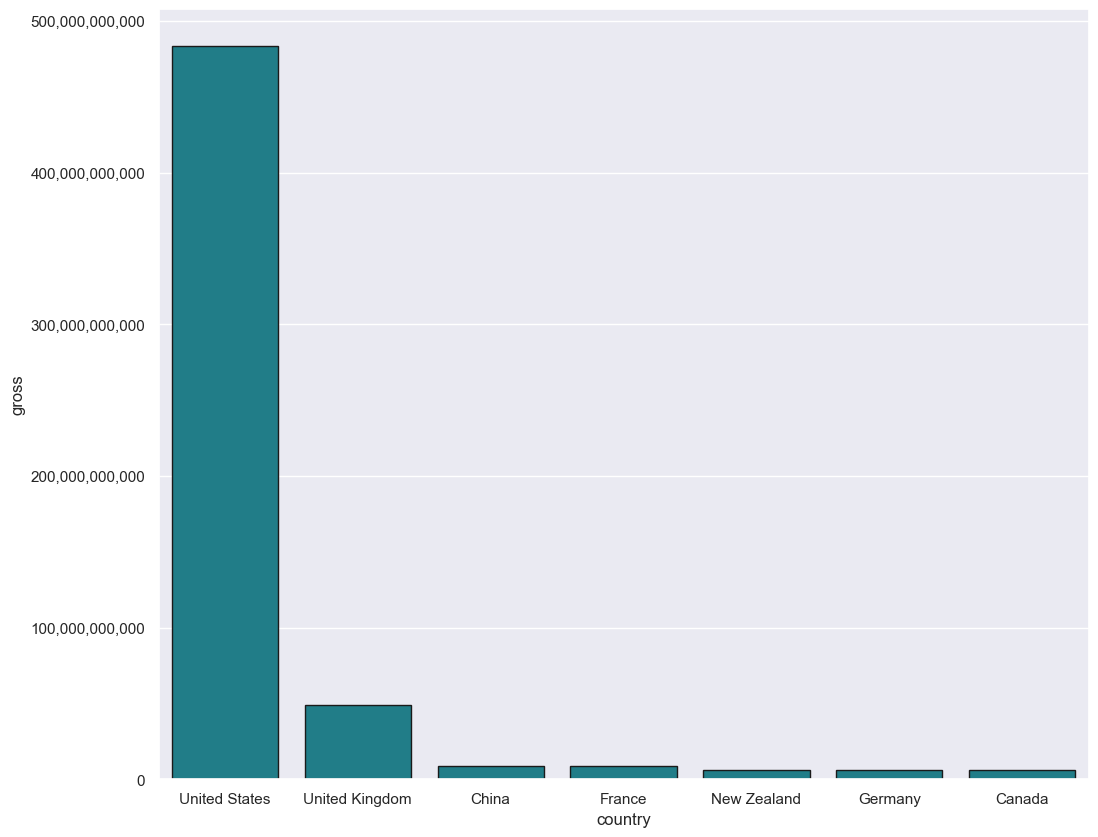

In [64]:
# top countries with gross margins
plt.figure(figsize = (12,10))
sns.barplot(x = df.groupby('country')['gross'].sum().sort_values(ascending = False)[:7].index,
            y = df.groupby('country')['gross'].sum().sort_values(ascending = False)[:7]
            , data = df, color = '#108A99', edgecolor = 'k').yaxis.set_major_formatter('{x:,.0f}')

Text(0, 0.5, 'Revenue')

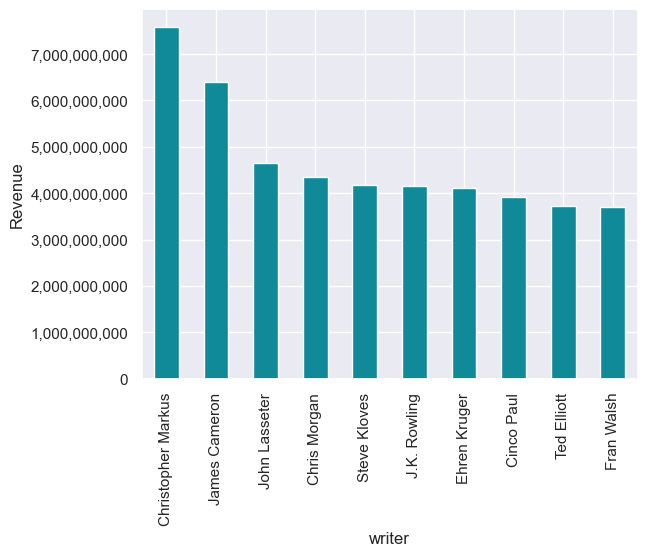

In [115]:
# if you want to invest in a writer,
# these are top tier writers with the highest profit margins.
(df.groupby('writer')['gross'].sum()).sort_values(ascending = False)[:10].plot(kind = 'bar'
                                            ,color = '#108A99').yaxis.set_major_formatter('{x:,.0f}')
plt.ylabel('Revenue')

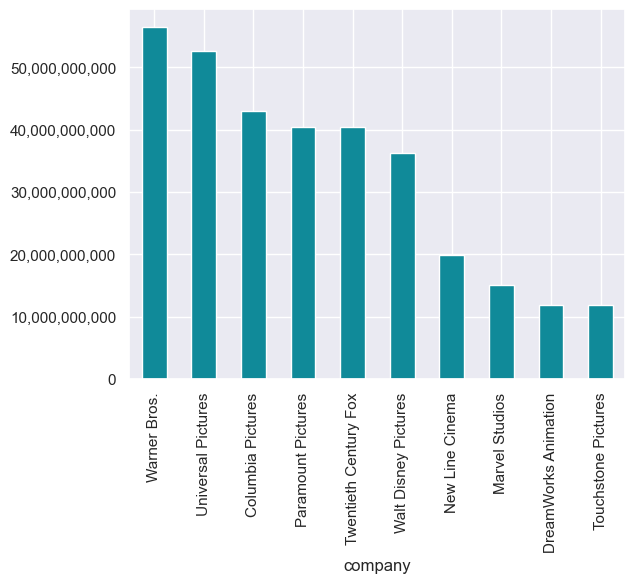

In [114]:
# if you want to invest in a company,
# these are top tier companies with the highest profit margins.
(df.groupby('company')['gross'].sum()).sort_values(ascending = False)[:10].plot(kind = 'bar'
                                            ,color = '#108A99').yaxis.set_major_formatter('{x:,.0f}')

<Axes: xlabel='month'>

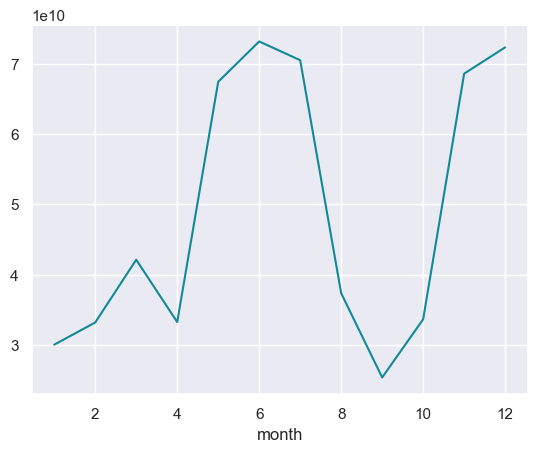

In [112]:
# monthly gross rate
df.groupby('month')['gross'].sum().plot(kind = 'line', color = '#108A99')

<Axes: xlabel='correct_year'>

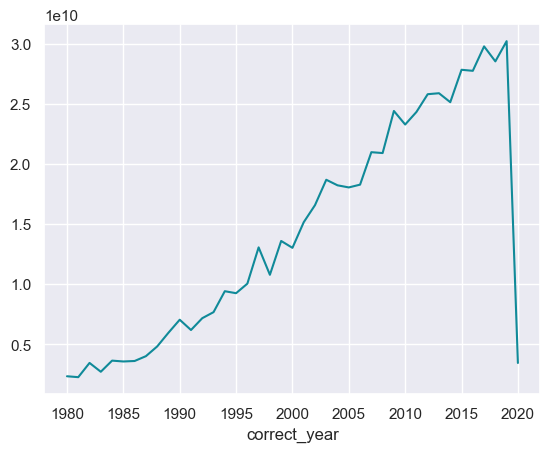

In [113]:
# yearly gross rate
df.groupby('correct_year')['gross'].sum().plot(kind = 'line', color = '#108A99')